In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab\ Notebooks/S5

/content/drive/My Drive/Colab Notebooks/S5


In [0]:
import lib_data as data
import lib_model as model
import lib_eval as eval
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
from multiprocessing import Pool
import pickle
import scipy.stats
from scipy.linalg import qr, solve, lstsq
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
#from mpl_toolkits.basemap import Basemap

#I. Model Evaluation on Temperature prediction - GULFSTREAM




## Experience 3 - GS 100 - Salanity 

In [0]:
# Load the data
X_train_gs_100 = pd.read_pickle("x_train_gs_100.pkl")
y_train_gs_100 = pd.read_pickle("y_train_gs_100.pkl")
nor_gs_100_train = True

In [0]:
min_class3 = 3
max_class3 = 7
iter_EM3 = 150
method3 = "kmeans"
nb_inter3 = 15
nb_features3 = X_train_gs_100.shape[1]
y_sal_train3 = y_train_gs_100[:,1].reshape(y_train_gs_100.shape[0],1)
n_targets3 = 1

In [0]:
# save info of the test
E3_info = {}
E3_info["min_class"] = 3
E3_info["max_class"] = 7
E3_info["iter_EM"] = 150
E3_info["method"] = "kmeans"
E3_info["nb_inter"] = 15
E3_info["n_target"] = 1
feature_mean = np.mean(X_train_gs_100, axis=0)
feature_mean[0] = 0
E3_info["feature_mean"] = feature_mean
feature_std = np.std(X_train_gs_100, axis=0)
feature_std[0] = 1
E3_info["feature_std"] = feature_std
output = open('E3_info.pkl', 'wb')
pickle.dump(E3_info, output)
output.close()

In [0]:
if nor_gs_100_train:
  X_train_gs_100[:,1:] = model.data_stdliz(X_train_gs_100[:,1:])
  nor_gs_100_train = False

In [0]:
nb_class3, inputs3 = model.input_data(X_train_gs_100,y_sal_train3, min_class3, max_class3, iter_EM3, method3, nb_inter3)

In [0]:
# train model
model.model_GPU(inputs3, nb_class3, nb_inter3, iter_EM3, nb_features3, n_targets3, nb = 3,save = True, al_targ = True)

### E3 - Evaluate train set - GS 100

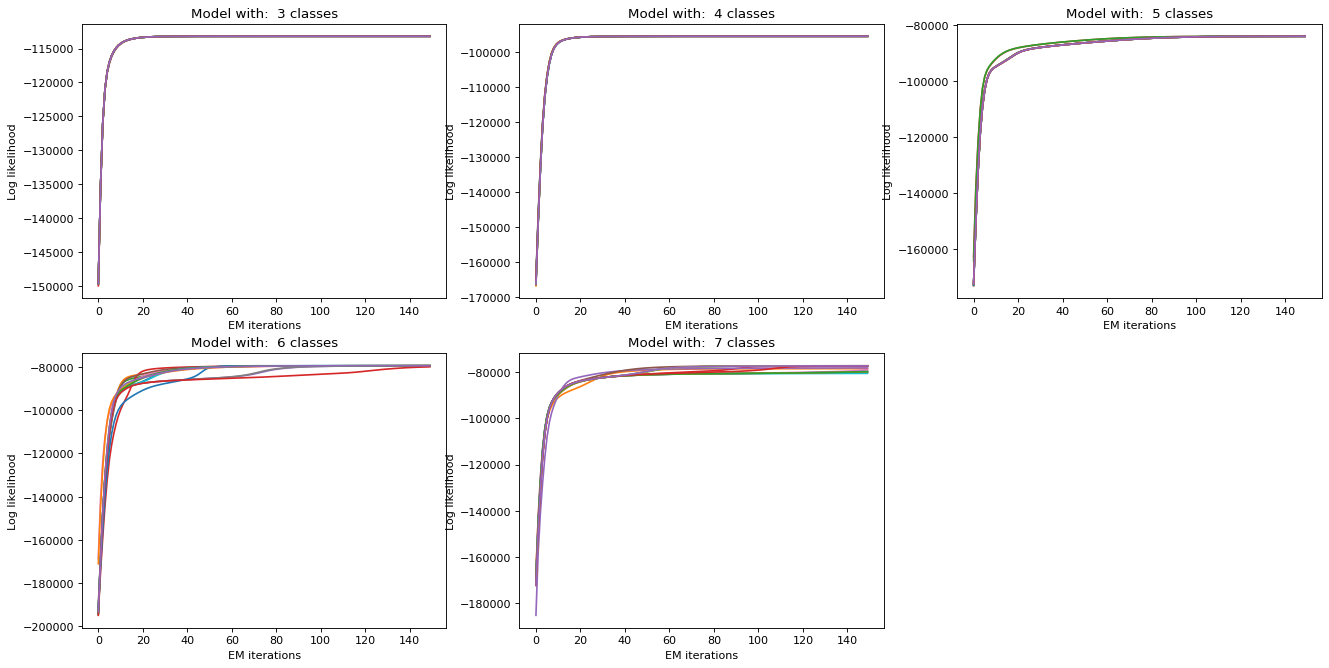

In [9]:
Log_3 = np.loadtxt('Log_E3.txt').reshape(len(nb_class3),nb_inter3,iter_EM3)
eval.likli_plot(Log_3,3,2,nb_class3,nb_inter3,iter_EM3)

In [0]:
Beta3_ = np.loadtxt("Beta_E3.txt").reshape(len(nb_class3),np.sum(np.asarray(nb_class3)),nb_features3,n_targets3)
Sigma3_ = np.loadtxt("Sigma_E3.txt").reshape(len(nb_class3),np.sum(np.asarray(nb_class3)),n_targets3,n_targets3)
Lamda3_ = np.loadtxt("Lamda_E3.txt").reshape(len(nb_class3),np.sum(np.asarray(nb_class3)),1)

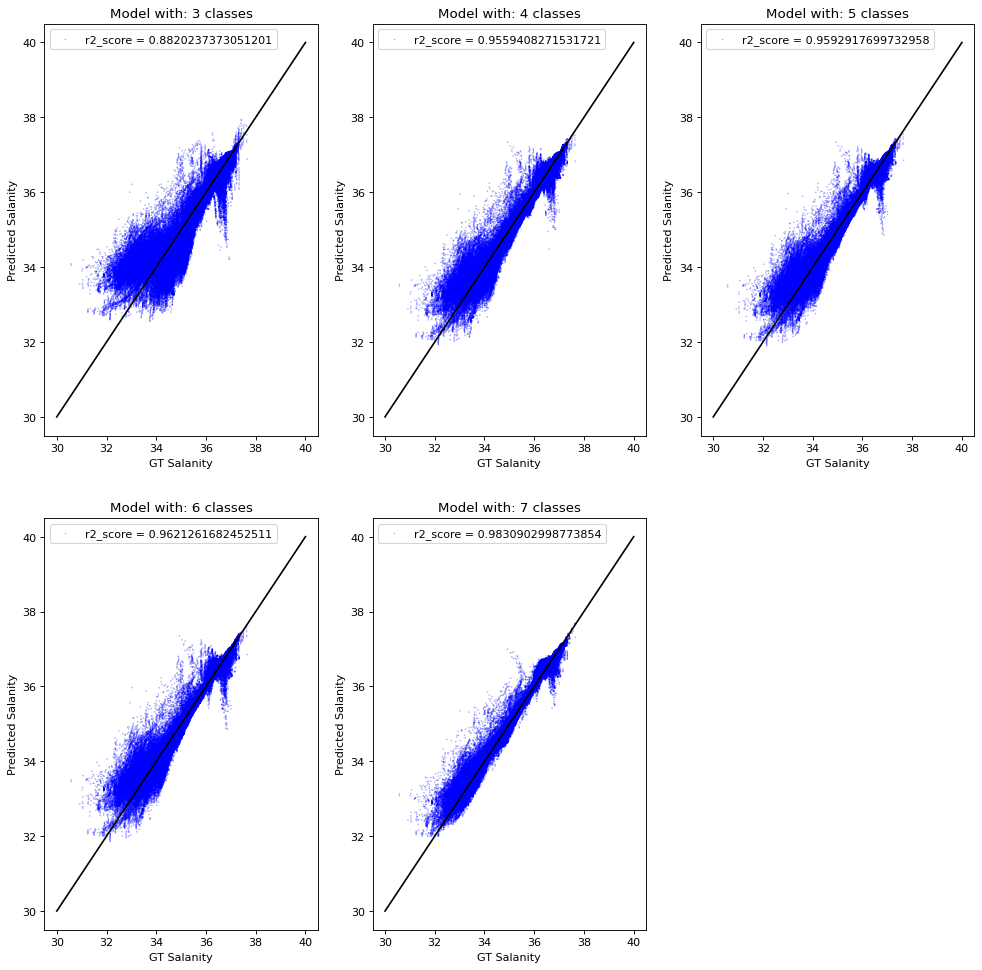

In [11]:
eval.sal_eval(Beta3_,Sigma3_,Lamda3_,X_train_gs_100,y_sal_train3,nb_class3,3,2,save = 5,nb = 3, test = False, fx1 =30 , fx2 = 40)

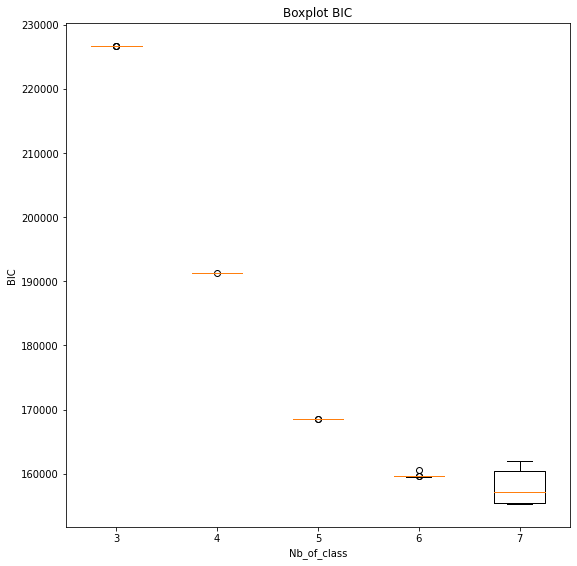

In [12]:
bic = np.loadtxt('BIC_E3.txt')
eval.bic_box(bic,nb_class3)

In [0]:
beta3_5,sigma3_5,lambda3_5 = eval.extract_bsl(Beta3_,Sigma3_,Lamda3_,X_train_gs_100,y_sal_train3,nb_class3,5,3)

In [0]:
eval.pi_hat(X_train_gs_100,y_sal_train3,beta3_5,sigma3_5,lambda3_5,X_train_gs_100.shape[0],nb = 3,th_class = 5, test = False)

### E3 - Evaluate test set - GS 100 

In [0]:
X_test_gs_100 = pd.read_pickle("x_test_gs_100.pkl")
y_test_gs_100 = pd.read_pickle("y_test_gs_100.pkl")
nor_gs_100_test = True

In [0]:
if nor_gs_100_test:
  X_test_gs_100[:,1:] = model.data_stdliz(X_test_gs_100[:,1:])
  nor_gs_100_test = False

In [0]:
y_sal_test3 = y_test_gs_100[:,1].reshape(y_test_gs_100.shape[0],1)

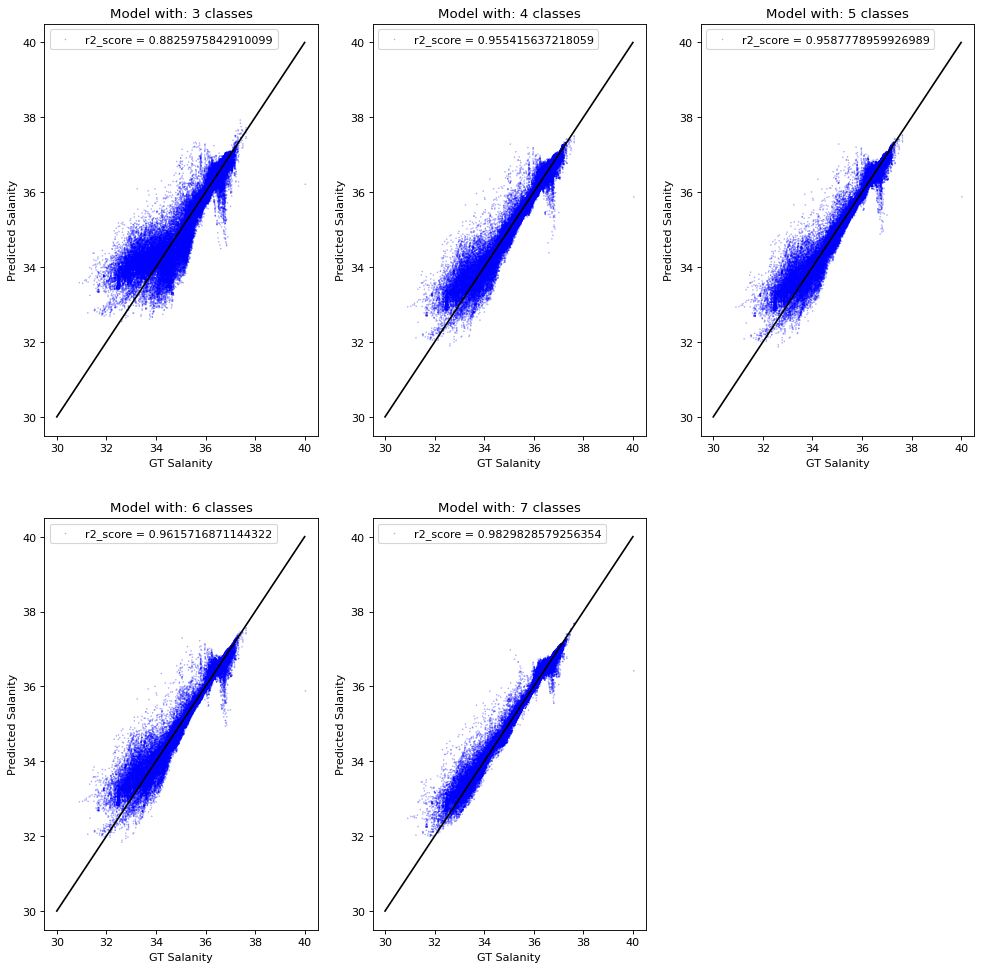

In [17]:
eval.sal_eval(Beta3_,Sigma3_,Lamda3_,X_test_gs_100,y_sal_test3,nb_class3,3,2,save = 5, nb = 3, test = True, fx1 =30 , fx2 = 40)

In [0]:
eval.pi_hat(X_test_gs_100,y_sal_test3,beta3_5,sigma3_5,lambda3_5,X_test_gs_100.shape[0],nb = 3,th_class = 5, test = True)

## Experience 1 - GS 100 - Temperature



In [0]:
# Load the data
X_train_gs_100 = pd.read_pickle("x_train_gs_100.pkl")
y_train_gs_100 = pd.read_pickle("y_train_gs_100.pkl")
nor_gs_100_train = True

In [0]:
min_class1 = 3
max_class1 = 7
iter_EM1 = 150
method1 = "kmeans"
nb_inter1 = 15
nb_features1 = X_train_gs_100.shape[1]
y_temp_train1 = y_train_gs_100[:,0].reshape(y_train_gs_100.shape[0],1)
n_targets1 = 1

In [0]:
# save info of the test
E1_info = {}
E1_info["min_class"] = 3
E1_info["max_class"] = 7
E1_info["iter_EM"] = 150
E1_info["method"] = "kmeans"
E1_info["nb_inter"] = 15
E1_info["n_target"] = 1
feature_mean = np.mean(X_train_gs_100, axis=0)
feature_mean[0] = 0
E1_info["feature_mean"] = feature_mean
feature_std = np.std(X_train_gs_100, axis=0)
feature_std[0] = 1
E1_info["feature_std"] = feature_std
output = open('E1_info.pkl', 'wb')
pickle.dump(E1_info, output)
output.close()

In [0]:
if nor_gs_100_train:
  X_train_gs_100[:,1:] = model.data_stdliz(X_train_gs_100[:,1:])
  nor_gs_100_train = False

In [0]:
nb_class1, inputs1 = model.input_data(X_train_gs_100,y_temp_train1, min_class1, max_class1, iter_EM1, method1, nb_inter1)

In [0]:
# train model
model.model_GPU(inputs1, nb_class1, nb_inter1, iter_EM1, nb_features1, n_targets1, nb = 1,save = True, al_targ = True)

### E1 - Evaluate train set - GS 100 


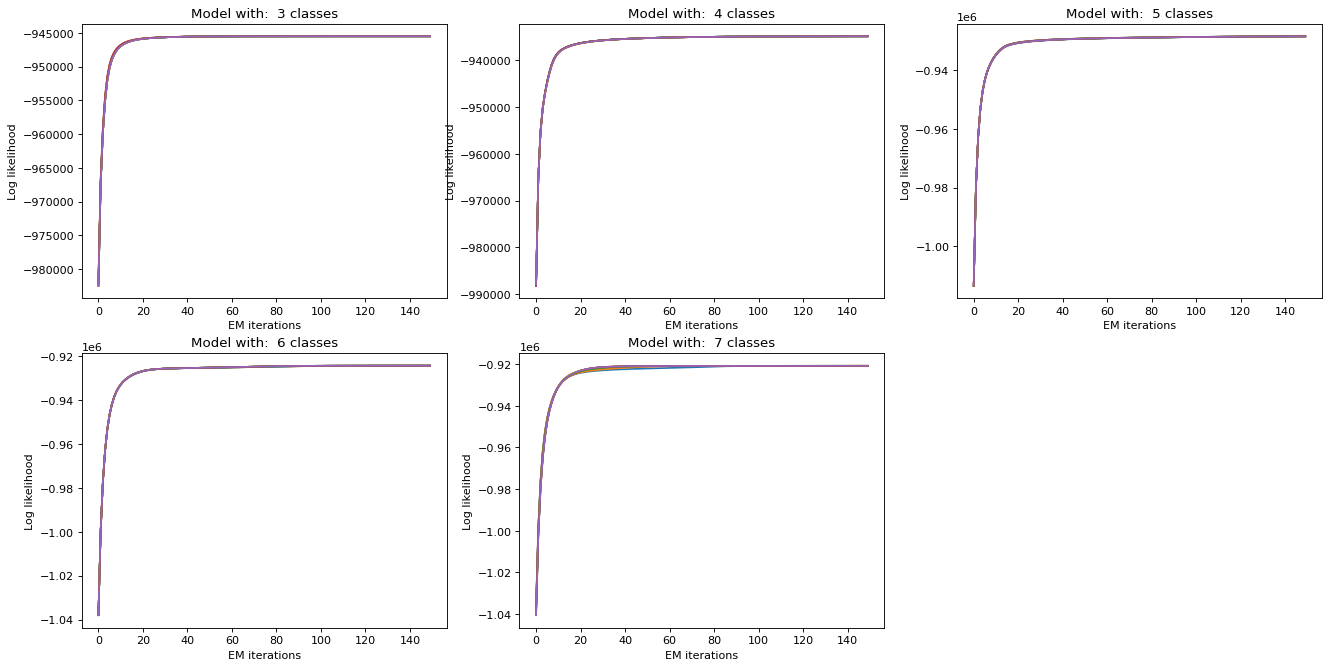

In [23]:
Log_1 = np.loadtxt('Log_E1.txt').reshape(len(nb_class1),nb_inter1,iter_EM1)
eval.likli_plot(Log_1,3,2,nb_class1,nb_inter1,iter_EM1)

In [0]:
Beta1_ = np.loadtxt("Beta_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),nb_features1,n_targets1)
Sigma1_ = np.loadtxt("Sigma_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),n_targets1,n_targets1)
Lamda1_ = np.loadtxt("Lamda_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),1)

In [0]:
eval.y_eval(Beta1_,Sigma1_,Lamda1_,X_train_gs_100,y_temp_train1,nb_class1,3,2,save = 5,nb = 1, test = False)

In [0]:
bic = np.loadtxt('BIC_E1.txt')
eval.bic_box(bic,nb_class1)

In [0]:
beta1_5,sigma1_5,lambda1_5 = eval.extract_bsl(Beta1_,Sigma1_,Lamda1_,X_train_gs_100,y_temp_train1,nb_class1,5,1)

In [0]:
eval.pi_hat(X_train_gs_100,y_temp_train1,beta1_5,sigma1_5,lambda1_5,X_train_gs_100.shape[0],nb = 1,th_class = 5, test = False)

### E1 - Evaluate test set - GS 100 


In [0]:
# Load the test data
X_test_gs_100 = pd.read_pickle("x_test_gs_100.pkl")
y_test_gs_100 = pd.read_pickle("y_test_gs_100.pkl")
nor_gs_100_test = True

In [0]:
if nor_gs_100_test:
  X_test_gs_100[:,1:] = model.data_stdliz(X_test_gs_100[:,1:])
  nor_gs_100_test = False

In [0]:
y_temp_test1 = y_test_gs_100[:,0].reshape(y_test_gs_100.shape[0],1)

In [0]:
eval.y_eval(Beta1_,Sigma1_,Lamda1_,X_test_gs_100,y_temp_test1,nb_class1,3,2,save = 5,nb = 1, test = True)

In [0]:
eval.pi_hat(X_test_gs_100,y_temp_test1,beta1_5,sigma1_5,lambda1_5,X_test_gs_100.shape[0],nb = 1,th_class = 5, test = True)

#II. Model Evaluation on Temperature prediction - KUROSHIO


## Experience 2 - KS 100 - 10 - Temperature

In [0]:
x_train_KS_p_100_10 = pd.read_pickle("x_train-KS-p_100-10.pkl")
y_train_KS_p_100_10 = pd.read_pickle("y_train-KS-p_100-10.pkl")
nor_train_KS_100_10 = True

In [0]:
min_class2 = 3
max_class2 = 7
iter_EM2 = 80
method2 = "kmeans"
nb_inter2 = 15
nb_features2 = x_train_KS_p_100_10.shape[1]
y_temp_train2 = y_train_KS_p_100_10[:,0].reshape(y_train_KS_p_100_10.shape[0],1)
n_targets2 = 1

In [0]:
# save info of the test
E2_info = {}
E2_info["min_class"] = 3
E2_info["max_class"] = 7
E2_info["iter_EM"] = 80
E2_info["method"] = "kmeans"
E2_info["nb_inter"] = 15
E2_info["n_target"] = 1
feature_mean = mean(x_train_KS_p_100_10, axis=0)
feature_mean[0] = 0
E2_info["feature_mean"] = feature_mean
feature_std = std(x_train_KS_p_100_10, axis=0)
feature_std[0] = 1
E2_info["feature_std"] = feature_std
output = open('E2_info.pkl', 'wb')
pickle.dump(E2_info, output)
output.close()

In [0]:
if nor_train_KS_100_10:
  x_train_KS_p_100_10[:,1:] = model.data_stdliz(x_train_KS_p_100_10[:,1:])
  nor_train_KS_100_10 = False

In [0]:
nb_class2, inputs2 = model.input_data(x_train_KS_p_100_10,y_temp_train2, min_class2, max_class2, iter_EM2, method2, nb_inter2)

In [0]:
# train model
model.model_GPU(inputs2, nb_class2, nb_inter2, iter_EM2, nb_features2, n_targets2, nb = 2,save = True, al_targ = True)

### E2 - Evaluate train set - KS 100 10

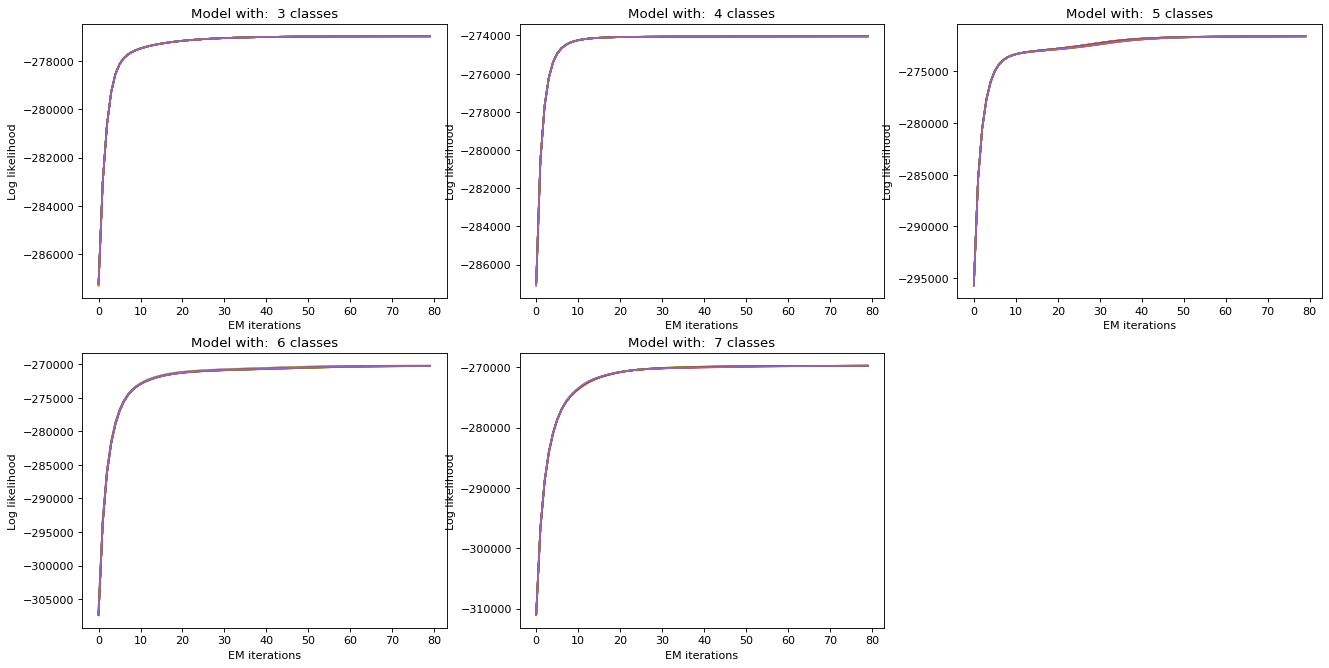

In [32]:
Log_E2 = np.loadtxt('Log_E2.txt').reshape(len(nb_class2),nb_inter2,iter_EM2)
eval.likli_plot(Log_E2,3,2,nb_class2,nb_inter2,iter_EM2)

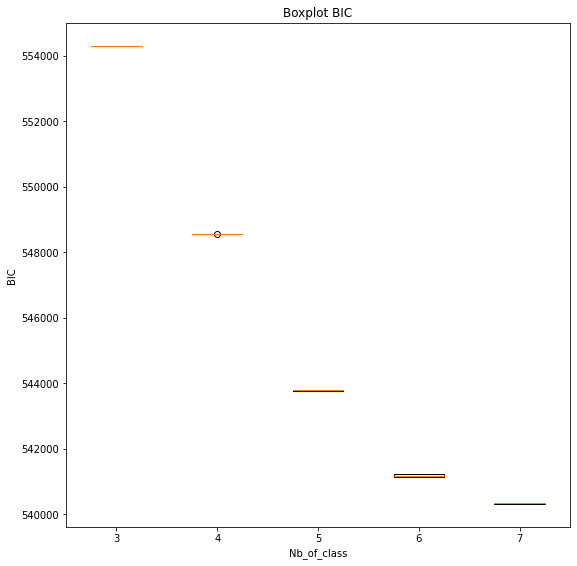

In [33]:
bic = np.loadtxt('BIC_E2.txt')
eval.bic_box(bic,nb_class2)

In [0]:
Beta2_ = np.loadtxt("Beta_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),nb_features2,n_targets2)
Sigma2_ = np.loadtxt("Sigma_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),n_targets2,n_targets2)
Lamda2_ = np.loadtxt("Lamda_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),1)

In [0]:
eval.y_eval(Beta2_,Sigma2_,Lamda2_,x_train_KS_p_100_10,y_temp_train2,nb_class2,3,2,save = 5,nb = 2, test = False)

In [0]:
beta2_5,sigma2_5,lambda2_5 = eval.extract_bsl(Beta2_,Sigma2_,Lamda2_,x_train_KS_p_100_10,y_temp_train2,nb_class2,th_class = 5, nb = 2)

In [0]:
eval.pi_hat(x_train_KS_p_100_10,y_temp_train2,beta2_5,sigma2_5,lambda2_5,x_train_KS_p_100_10.shape[0],nb = 2,th_class = 5, test = False)

### E2 - Evaluate test set - KS 100 10

In [0]:
x_test_KS_p_100_10 = pd.read_pickle("x_test-KS-p_100-10.pkl")
y_test_KS_p_100_10 = pd.read_pickle("y_test-KS-p_100-10.pkl")
nor_test_KS_100_10 = True

In [0]:
if nor_test_KS_100_10:
  x_test_KS_p_100_10[:,1:] = model.data_stdliz(x_test_KS_p_100_10[:,1:])
  nor_test_KS_100_10 = False

In [0]:
y_temp_test2 = y_test_KS_p_100_10[:,0].reshape(y_test_KS_p_100_10.shape[0],1)

In [0]:
eval.y_eval(Beta2_,Sigma2_,Lamda2_,x_test_KS_p_100_10,y_temp_test2,nb_class2,3,2,save = 5,nb = 2, test = True)

In [0]:
eval.pi_hat(x_test_KS_p_100_10,y_temp_test2,beta2_5,sigma2_5,lambda2_5,x_test_KS_p_100_10.shape[0],nb = 2,th_class = 5, test = True)

## Experience 4 - KS 100 - 10 - Salanity

In [0]:
x_train_KS_p_100_10 = pd.read_pickle("x_train-KS-p_100-10.pkl")
y_train_KS_p_100_10 = pd.read_pickle("y_train-KS-p_100-10.pkl")
nor_train_KS_100_10 = True

In [0]:
min_class4 = 3
max_class4 = 7
iter_EM4 = 180
method4 = "kmeans"
nb_inter4 = 15
nb_features4 = x_train_KS_p_100_10.shape[1]
y_sal_train4 = y_train_KS_p_100_10[:,1].reshape(y_train_KS_p_100_10.shape[0],1)
n_targets4 = 1

In [0]:
# save info of the test
E4_info = {}
E4_info["min_class"] = 3
E4_info["max_class"] = 7
E4_info["iter_EM"] = 180
E4_info["method"] = "kmeans"
E4_info["nb_inter"] = 15
E4_info["n_target"] = 1
feature_mean = mean(x_train_KS_p_100_10, axis=0)
feature_mean[0] = 0
E4_info["feature_mean"] = feature_mean
feature_std = std(x_train_KS_p_100_10, axis=0)
feature_std[0] = 1
E4_info["feature_std"] = feature_std
output = open('E4_info.pkl', 'wb')
pickle.dump(E4_info, output)
output.close()

In [0]:
if nor_train_KS_100_10:
  x_train_KS_p_100_10[:,1:] = model.data_stdliz(x_train_KS_p_100_10[:,1:])
  nor_train_KS_100_10 = False

In [0]:
nb_class4, inputs4 = model.input_data(x_train_KS_p_100_10,y_sal_train4, min_class4, max_class4, iter_EM4, method4, nb_inter4)

In [0]:
# train model
model.model_GPU(inputs4, nb_class4, nb_inter4, iter_EM4, nb_features4, n_targets4, nb = 4,save = True, al_targ = True)

### E4 - Evaluate train set - KS 100 10

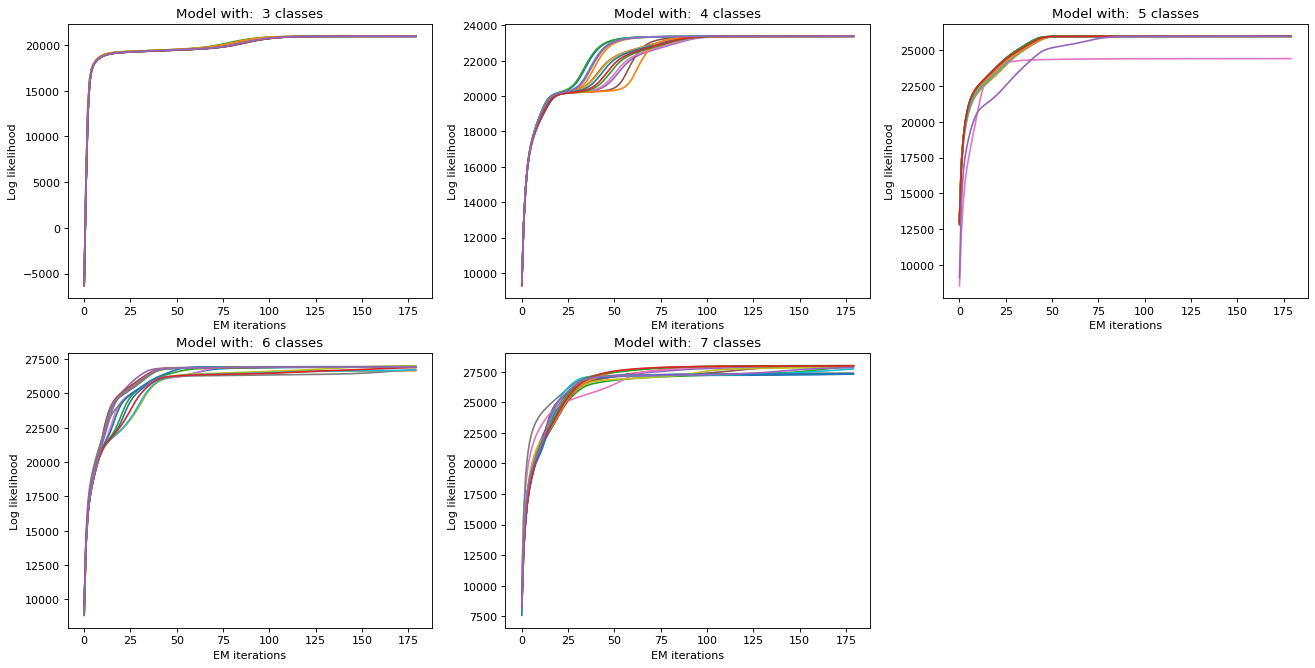

In [47]:
Log_E4 = np.loadtxt('Log_E4.txt').reshape(len(nb_class4),nb_inter4,iter_EM4)
eval.likli_plot(Log_E4,3,2,nb_class4,nb_inter4,iter_EM4)

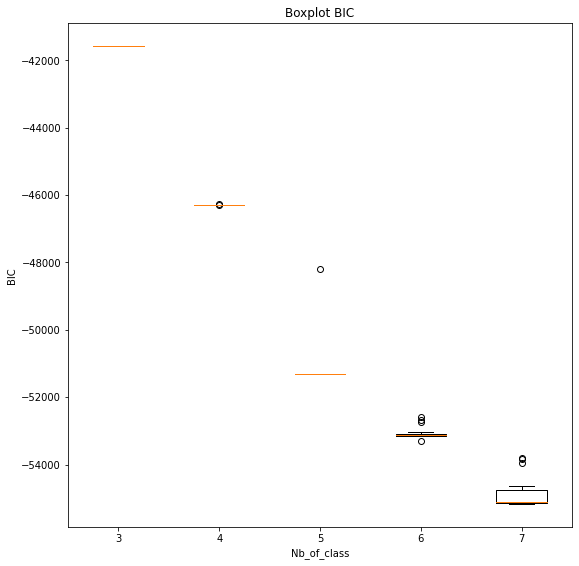

In [48]:
bic = np.loadtxt('BIC_E4.txt')
eval.bic_box(bic,nb_class4)

In [0]:
Beta4_ = np.loadtxt("Beta_E4.txt").reshape(len(nb_class4),np.sum(np.asarray(nb_class4)),nb_features4,n_targets4)
Sigma4_ = np.loadtxt("Sigma_E4.txt").reshape(len(nb_class4),np.sum(np.asarray(nb_class4)),n_targets4,n_targets4)
Lamda4_ = np.loadtxt("Lamda_E4.txt").reshape(len(nb_class4),np.sum(np.asarray(nb_class4)),1)

In [0]:
Lamda4_.shape

In [0]:
eval.sal_eval(Beta4_,Sigma4_,Lamda4_,x_train_KS_p_100_10,y_sal_train4,nb_class4,3,2,save = 5,nb = 4, test = False, fx1 =30 , fx2 = 38)

In [0]:
beta4_5,sigma4_5,lambda4_5 = eval.extract_bsl(Beta4_,Sigma4_,Lamda4_,x_train_KS_p_100_10,y_sal_train4,nb_class4,th_class = 5, nb = 4)

In [0]:
eval.pi_hat(x_train_KS_p_100_10,y_sal_train4,beta4_5,sigma4_5,lambda4_5,x_train_KS_p_100_10.shape[0],nb = 4,th_class = 5, test = False)

### E4 - Evaluate test set - KS 100-10

In [0]:
x_test_KS_p_100_10 = pd.read_pickle("x_test-KS-p_100-10.pkl")
y_test_KS_p_100_10 = pd.read_pickle("y_test-KS-p_100-10.pkl")
nor_test_KS_100_10 = True

In [0]:
if nor_test_KS_100_10:
  x_test_KS_p_100_10[:,1:] = model.data_stdliz(x_test_KS_p_100_10[:,1:])
  nor_test_KS_100_10 = False

In [0]:
y_sal_test4 = y_test_KS_p_100_10[:,1].reshape(y_test_KS_p_100_10.shape[0],1)

In [0]:
# eval.sal_eval(Beta4_,Sigma4_,Lamda4_,x_test_KS_p_100_10,y_sal_test4,nb_class4,3,2,save = 5,nb = 4, test = True)

In [0]:
eval.pi_hat(x_test_KS_p_100_10,y_sal_test4,beta4_5,sigma4_5,lambda4_5,x_test_KS_p_100_10.shape[0],nb = 4,th_class = 5, test = True)

## Experience 5- GS - 1000 - Temperature



In [0]:
x_train_GS = pd.read_pickle("x_train_GS_1000.pkl")[:2000000,:]
y_train_GS = pd.read_pickle("y_train_GS_1000.pkl")[:2000000,:]
nor_train_GS = True

In [0]:
y_train_GS_temp = y_train_GS[:,0].reshape(y_train_GS.shape[0],1)

In [0]:
min_class5 = 4
max_class5 = 9
iter_EM5 = 300
method5 = "kmeans"
nb_inter5 = 10
nb_features5 = x_train_GS.shape[1]
n_targets5 = 1

In [0]:
# save info of the test
E5_info = {}
E5_info["min_class"] = 4
E5_info["max_class"] = 9
E5_info["iter_EM"] = 300
E5_info["method"] = "kmeans"
E5_info["nb_inter"] = 10
E5_info["n_target"] = 1
feature_mean = mean(x_train_GS, axis=0)
feature_mean[0] = 0
E5_info["feature_mean"] = feature_mean
feature_std = std(x_train_GS, axis=0)
feature_std[0] = 1
E5_info["feature_std"] = feature_std
output = open('E5_info.pkl', 'wb')
pickle.dump(E5_info, output)
output.close()

In [0]:
if nor_train_GS:
  x_train_GS[:,1:] = model.data_stdliz(x_train_GS[:,1:])
  nor_train_GS = False

In [0]:
nb_class5, inputs5 = model.input_data(x_train_GS,y_train_GS_temp, min_class5, max_class5, iter_EM5, method5, nb_inter5)

In [0]:
# train model
# model.model_GPU_tempsal(inputs5, nb_class5, nb_inter5, iter_EM5, nb_features5, n_targets5, nb = 5,save = True, al_targ = True)
model.model_GPU(inputs5, nb_class5, nb_inter5, iter_EM5, nb_features5, n_targets5, nb = 5,save = True, al_targ = True)

In [0]:
# Log_E5 = np.loadtxt('Log_E5.txt').reshape(len(nb_class5),nb_inter5,iter_EM5)
# eval.likli_plot(Log_E5,3,2,nb_class5,nb_inter5,iter_EM5)

## Experience 8- GS - 1000 - emperature

In [0]:
x_train_GS = pd.read_pickle("x_train_GS_1000.pkl")
y_train_GS = pd.read_pickle("y_train_GS_1000.pkl")
nor_train_GS = True

y_train_GS_temp = y_train_GS[:,0].reshape(y_train_GS.shape[0],1)

min_class8 = 4
max_class8 = 10
iter_EM8 = 300
method8 = "kmeans"
nb_inter8 = 10
nb_features8 = x_train_GS.shape[1]
n_targets8 = 1

# save info of the test
E8_info = {}
E8_info["min_class"] = 4
E8_info["max_class"] = 10
E8_info["iter_EM"] = 300
E8_info["method"] = "kmeans"
E8_info["nb_inter"] = 10
E8_info["n_target"] = 1
feature_mean = mean(x_train_GS, axis=0)
feature_mean[0] = 0
E8_info["feature_mean"] = feature_mean
feature_std = std(x_train_GS, axis=0)
feature_std[0] = 1
E8_info["feature_std"] = feature_std
output = open('E8_info.pkl', 'wb')
pickle.dump(E8_info, output)
output.close()

if nor_train_GS:
  x_train_GS[:,1:] = model.data_stdliz(x_train_GS[:,1:])
  nor_train_GS = False

nb_class8, inputs8 = model.input_data(x_train_GS,y_train_GS_temp, min_class8, max_class8, iter_EM8, method8, nb_inter8)


In [0]:
# train model
model.model_GPU(inputs8, nb_class8, nb_inter8, iter_EM8, nb_features8, n_targets8, nb = 8,save = True, al_targ = True)

#### E8: TRAIN

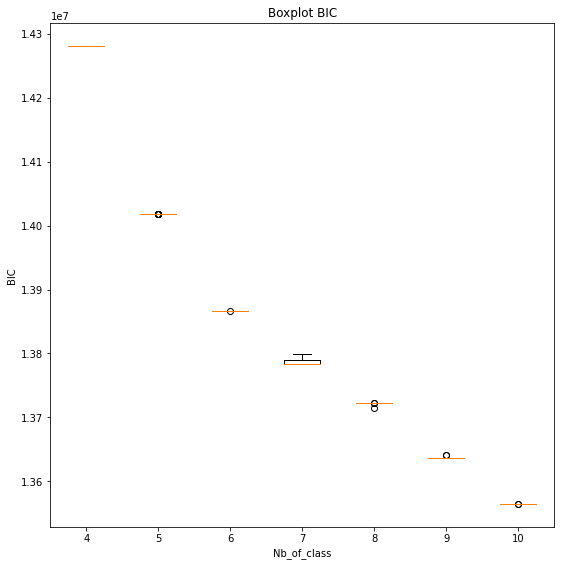

In [0]:
bic = np.loadtxt('BIC_E8.txt')
eval.bic_box(bic,nb_class8,'tempboxplot')

In [0]:
Beta8_ = np.loadtxt("Beta_E8.txt").reshape(len(nb_class8),np.sum(np.asarray(nb_class8)),nb_features8,n_targets8)
Sigma8_ = np.loadtxt("Sigma_E8.txt").reshape(len(nb_class8),np.sum(np.asarray(nb_class8)),n_targets8,n_targets8)
Lamda8_ = np.loadtxt("Lamda_E8.txt").reshape(len(nb_class8),np.sum(np.asarray(nb_class8)),1)

In [0]:
eval.y_eval(Beta8_,Sigma8_,Lamda8_,x_train_GS,y_train_GS_temp,nb_class8,3,2,save = 8,nb = 8, test = False)

<Figure size 1200x1200 with 0 Axes>

In [0]:
beta8_8,sigma8_8,lambda8_8 = eval.extract_bsl(Beta8_,Sigma8_,Lamda8_,x_train_GS,y_train_GS_temp,nb_class8,th_class = 8, nb = 8)

In [0]:
eval.pi_hat(x_train_GS,y_train_GS_temp,beta8_8,sigma8_8,lambda8_8,x_train_GS.shape[0],nb = 8,th_class = 8, test = False)

#### E8 TEST

In [0]:
x_test_GS = pd.read_pickle("x_test_GS_1000.pkl")
y_test_GS = pd.read_pickle("y_test_GS_1000.pkl")
nor_train_GS = True

In [0]:
y_test_GS_temp = y_test_GS[:,0].reshape(y_test_GS.shape[0],1)

In [0]:
if nor_train_GS:
  x_test_GS[:,1:] = model.data_stdliz(x_test_GS[:,1:])
  nor_train_GS = False

In [0]:
eval.y_eval(Beta8_,Sigma8_,Lamda8_,x_test_GS,y_test_GS_temp,nb_class8,3,2,save = 8,nb = 8, test = True)

<Figure size 1200x1200 with 0 Axes>

In [0]:
eval.pi_hat(x_test_GS,y_test_GS_temp,beta8_8,sigma8_8,lambda8_8,x_test_GS.shape[0],nb = 8,th_class = 8, test = True)

## Experience 9- GS - 1000 - Salanité


In [0]:
x_train_GS = pd.read_pickle("x_train_GS_1000.pkl")
y_train_GS = pd.read_pickle("y_train_GS_1000.pkl")
nor_train_GS = True

y_train_GS_temp = y_train_GS[:,1].reshape(y_train_GS.shape[0],1)

min_class9 = 4
max_class9 = 10
iter_EM9 = 300
method9 = "kmeans"
nb_inter9 = 10
nb_features9 = x_train_GS.shape[1]
n_targets9 = 1

# save info of the test
E9_info = {}
E9_info["min_class"] = 4
E9_info["max_class"] = 10
E9_info["iter_EM"] = 300
E9_info["method"] = "kmeans"
E9_info["nb_inter"] = 10
E9_info["n_target"] = 1
feature_mean = mean(x_train_GS, axis=0)
feature_mean[0] = 0
E9_info["feature_mean"] = feature_mean
feature_std = std(x_train_GS, axis=0)
feature_std[0] = 1
E9_info["feature_std"] = feature_std
output = open('E9_info.pkl', 'wb')
pickle.dump(E9_info, output)
output.close()

if nor_train_GS:
  x_train_GS[:,1:] = model.data_stdliz(x_train_GS[:,1:])
  nor_train_GS = False

nb_class9, inputs9 = model.input_data(x_train_GS,y_train_GS_temp, min_class9, max_class9, iter_EM9, method9, nb_inter9)

In [0]:
# train model
model.model_GPU(inputs9, nb_class9, nb_inter9, iter_EM9, nb_features9, n_targets9, nb = 9,save = True, al_targ = True)

#### E9: TRAIN

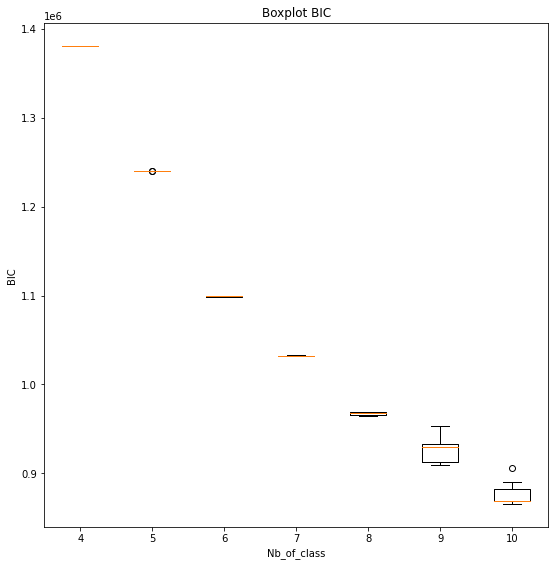

In [0]:
bic = np.loadtxt('BIC_E9.txt')
eval.bic_box(bic,nb_class9,'salboxplot')

In [0]:
Beta9_ = np.loadtxt("Beta_E9.txt").reshape(len(nb_class9),np.sum(np.asarray(nb_class9)),nb_features9,n_targets9)
Sigma9_ = np.loadtxt("Sigma_E9.txt").reshape(len(nb_class9),np.sum(np.asarray(nb_class9)),n_targets9,n_targets9)
Lamda9_ = np.loadtxt("Lamda_E9.txt").reshape(len(nb_class9),np.sum(np.asarray(nb_class9)),1)

In [0]:
eval.y_eval(Beta9_,Sigma9_,Lamda9_,x_train_GS,y_train_GS_temp,nb_class9,3,2,save = 8,nb = 9, test = False)

<Figure size 1200x1200 with 0 Axes>

In [0]:
beta9_8,sigma9_8,lambda9_8 = eval.extract_bsl(Beta9_,Sigma9_,Lamda9_,x_train_GS,y_train_GS_temp,nb_class9,th_class = 8, nb = 9)

In [0]:
eval.pi_hat(x_train_GS,y_train_GS_temp,beta9_8,sigma9_8,lambda9_8,x_train_GS.shape[0],nb = 9,th_class = 8, test = False)

### E2 - Evaluate train set - KS 100 10  - Salanity and Temperature

In [0]:
Log_E5 = pd.read_pickle('Log_E5.pkl').reshape(len(nb_class5),nb_inter5,iter_EM5)
eval.likli_plot(Log_E5,4,3,nb_class5,nb_inter5,iter_EM5)

In [0]:
bic = pd.read_pickle('BIC_E5.pkl')
eval.bic_box(bic,nb_class5)

In [0]:
Beta5_ = pd.read_pickle("Beta_E5.pkl")
Sigma5_ = pd.read_pickle("Sigma_E5.pkl")
Lamda5_ = pd.read_pickle("Lamda_E5.pkl")

In [0]:
tempsal_eval(Beta5_,Sigma5_,Lamda5_,x_train_KS_p_100_10,y_train_KS_p_100_10,nb_class5,3,3,save = 3,nb = 5, test = False)

In [0]:
def tempsal_eval(beta_,sigma_,lambda_,X,y,nb_class,coln,row, save,nb, test, sal_min = 32, sal_max =39 ):

  """
    Calculate the estimated temperature and salinity

  - save: the class saved for result visualization
  - test: if test True, save as test result
  - nb: nb th experience
  """

  index = 0
  th = 0
  p = 0

  figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
  x_linsp = np.linspace(-5,35,50)

  x_sal = np.linspace(sal_min,sal_max,50)

  markers = 0.1*np.full((y.shape[0], 1), 1)
  
  for c in range(len(nb_class)):

    beta_c = beta_[c,index:index + nb_class[th],:,:]
    sigma_c = sigma_[c,index:index + nb_class[th],:,:]
    lambda_c = lambda_[c,index:index + nb_class[th],:]
    y_esti,_ = tempsal_h_esti(X,y,beta_c,sigma_c,lambda_c,X.shape[0])

    # save interesting class
    if nb_class[c] == save:

        if test:

            tempsal_h_test_E = open('tempsal_h_test_E'+str(nb)+'_'+str(nb_class[c])+'.pkl', 'wb')
            pickle.dump(y_esti, tempsal_h_test_E)
            tempsal_h_test_E.close()

        else:

            temsal_h_train_E = open('temsal_h_train_E'+str(nb)+'_'+str(nb_class[c])+'.pkl', 'wb')
            pickle.dump(y_esti, temsal_h_train_E)
            temsal_h_train_E.close()
    p = p + 1
    plt.subplot(row, coln, p)
    plt.scatter(y[:,0],y_esti[:,0], marker = ".", s = markers, c ='b', label = "r2_score = " +str(r2_score(y[:,0], y_esti[:,0])))
    plt.plot(x_linsp,x_linsp,'k')
    plt.ylabel('Predicted Temperature')
    plt.xlabel('GT Temperature')
    plt.title('Model with: '+str(nb_class[c])+' classes')
    plt.legend()

    p = p + 1
    plt.subplot(row, coln, p)
    plt.scatter(y[:,1],y_esti[:,1], marker = ".", s = markers, c ='b', label = "r2_score = " +str(r2_score(y[:,1], y_esti[:,1])))
    plt.plot(x_sal,x_sal,'k')
    plt.ylabel('Predicted Salinity')
    plt.xlabel('GT Salinity')
    plt.title('Model with: '+str(nb_class[c])+' classes')
    plt.legend()

    index = index + nb_class[th]
    th = th +1

In [0]:
def tempsal_h_esti(X_,y_,Beta,Sigma,Lambda,n):
  """ Estimate y_hat

  - Beta: (K,nb_fea,nb_tar)
  - Sigma: (K,nb_tar,nb_tar)
  - Lambda: (K,1)
  - n: nb of samples
  """

  K  = Beta.shape[0]
  tars = Beta.shape[2]

  X = torch.from_numpy(X_).cuda()
  Y = torch.from_numpy(y_).cuda()
  Beta_hat = torch.from_numpy(Beta).cuda()
  Sigma_hat = torch.from_numpy(Sigma).cuda()
  Lambda_hat = torch.from_numpy(Lambda).cuda()

  pi_hat = torch.zeros(n,Lambda.shape[0]).cuda()
  y_hat = torch.zeros(n,tars).cuda()
  sum_prob = torch.zeros(n,1).cuda()

  for k in range(K):
      sum_prob = sum_prob + Lambda_hat[k]*torch.exp(MultivariateNormal(X@Beta_hat[k,:,:],Sigma_hat[k,:,:]).log_prob(Y)).reshape(n,1)

  for k in range(K):
    # Compute how many percentage each class representing in each profile (formla 7)
    pi_hat[:,k]= Lambda_hat[k]*torch.exp(MultivariateNormal(X@Beta_hat[k,:,:],Sigma_hat[k,:,:]).log_prob(Y))/sum_prob[:,0]

  for k in range(K):
    y_hat = y_hat + torch.mul(pi_hat[:,k].reshape(n,1),X@Beta_hat[k,:,:])

  y_hat_np = y_hat.cpu().numpy()
  pi_hat_np = pi_hat.cpu().numpy()

  return y_hat_np,pi_hat_np